1 A)

In [1]:
import numpy as np

def simulate_strategy_B(k, p, num_trials=100000):
    """
    Simulates the number of tests required using Strategy B.
    
    Parameters:
        k (int): Number of light bulbs.
        p (float): Probability of each bulb being defective.
        num_trials (int): Number of simulations.
        
    Returns:
        float: Estimated expected number of tests E[X].
    """
    total_tests = 0
    
    for _ in range(num_trials):
    
        bulbs_work = np.random.rand(k) > p  # true if working, false if defective
        
        if np.all(bulbs_work):  # Check : all bulbs work- 1 test, otherwise  k+1 tests
            total_tests += 1
        else:  
            total_tests += k + 1

    # Estimate of expected number of tests
    return total_tests / num_trials

# Parameters
k = 5  #  bulbs
p = 0.2  # prob of failure

estimated_E_X = simulate_strategy_B(k, p)

# Theoretical Expected Value
theoretical_E_X = k + 1 - k * (1 - p)**k

# Display Results
print(f"Estimated E[X] from Simulation: {estimated_E_X:.4f}")
print(f"Theoretical E[X]: {theoretical_E_X:.4f}")

Estimated E[X] from Simulation: 4.3616
Theoretical E[X]: 4.3616


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.default_rng()

def simulate_strategy_B(k, p, nrRuns=100000):
   
    # Makes a matrix with True and False with working and not working bulbs 
    bulb_working = rng.random(size=(nrRuns, k)) > p  
    
    all_bulbs_work = np.all(bulb_working, axis=1)  # This checks if all bulbs work in a circuit (row)
    
    # number of tests required: 1 if all bulbs work, k+1 otherwise
    test_counts = np.where(all_bulbs_work, 1, k + 1)
    
    return test_counts

def computeCI(data, confidence=0.95):

    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  
    margin = norm.ppf((1 + confidence) / 2) * std_err  
    return mean, mean - margin, mean + margin

# These are some values for k and p
k_values = [2, 5, 10, 20]  
p_values = [0.1, 0.2, 0.5]  
nrRuns = 100000  

results = []

#Simulations for different values of k and p
for k in k_values:
    for p in p_values:
        test_results = simulate_strategy_B(k, p, nrRuns)
        estimated_E_X, lower_CI, upper_CI = computeCI(test_results)
        theoretical_E_X = k + 1 - k * (1 - p) ** k
        

        results.append([k, p, estimated_E_X, lower_CI, upper_CI, theoretical_E_X])



df_results = pd.DataFrame(results, columns=["k", "p", "Estimated E[X]", "Lower 95% CI", "Upper 95% CI", "Theoretical E[X]"])
df_results

,k,p,Estimated E[X],Lower 95% CI,Upper 95% CI,Theoretical E[X]
0,2,0.1,1.38362,1.378739,1.388501,1.380000
1,2,0.2,1.71584,1.709898,1.721782,1.720000
2,2,0.5,2.49724,2.491863,2.502617,2.500000
3,5,0.1,3.03385,3.018627,3.049073,3.047550
4,5,0.2,4.36280,4.348257,4.377343,4.361600
5,5,0.5,5.84635,5.841002,5.851698,5.843750
6,10,0.1,7.50970,7.480156,7.539244,7.513216
7,10,0.2,9.92670,9.907515,9.945885,9.926258
8,10,0.5,10.99060,10.988701,10.992499,10.990234
9,20,0.1,18.58140,18.540983,18.621817,18.568467


In [22]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import DescrStatsW

rng = np.random.default_rng()

def simulate_strategy_B(k, p, nrRuns=100000):
    
    bulb_working = rng.random(size=(nrRuns, k)) > p   # Makes a matrix with True and False with working and not working bulbs 
    all_bulbs_work = np.all(bulb_working, axis=1)  # This checks if all bulbs work in a circuit (row)
    test_counts = np.where(all_bulbs_work, 1, k + 1)  # number of tests required: 1 if all bulbs work, k+1 otherwise
    return test_counts

k_values = [2, 5, 10, 20]  
p_values = [0.1, 0.2, 0.5]  
nrRuns = 100000  

results = []

for k in k_values:
    for p in p_values:
        test_results = simulate_strategy_B(k, p, nrRuns)
        
        # CI
        stats = DescrStatsW(test_results)
        estimated_E_X = stats.mean
        lower_CI, upper_CI = stats.tconfint_mean(alpha=0.05)

        theoretical_E_X = k + 1 - k * (1 - p) ** k
        
        results.append([k, p, estimated_E_X, lower_CI, upper_CI, theoretical_E_X])


df_results = pd.DataFrame(results, columns=["k", "p", "Estimated E[X]", "Lower 95% CI", "Upper 95% CI", "Theoretical E[X]"])
df_results


,k,p,Estimated E[X],Lower 95% CI,Upper 95% CI,Theoretical E[X]
0,2,0.1,1.37910,1.374241,1.383959,1.380000
1,2,0.2,1.72308,1.717124,1.729036,1.720000
2,2,0.5,2.50132,2.495957,2.506683,2.500000
3,5,0.1,3.05270,3.037455,3.067945,3.047550
4,5,0.2,4.36505,4.350512,4.379588,4.361600
5,5,0.5,5.84030,5.834851,5.845749,5.843750
6,10,0.1,7.50450,7.474946,7.534054,7.513216
7,10,0.2,9.93100,9.911849,9.950151,9.926258
8,10,0.5,10.99200,10.990248,10.993752,10.990234
9,20,0.1,18.60020,18.559919,18.640481,18.568467


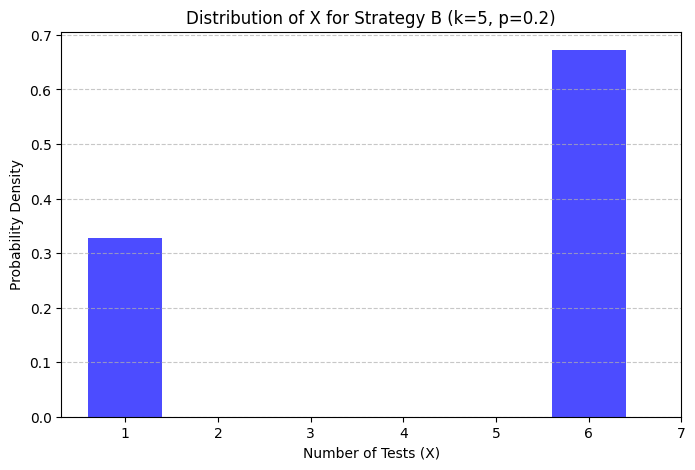

In [7]:
k_example, p_example = 5, 0.2
test_results = simulate_strategy_B(k_example, p_example, nrRuns)

plt.figure(figsize=(8,5))
plt.hist(test_results, bins=np.arange(min(test_results) - 0.5, max(test_results) + 1.5, 1), 
         density=True, alpha=0.7, rwidth=0.8, color='b')
plt.xlabel("Number of Tests (X)")
plt.ylabel("Probability Density")
plt.title(f"Distribution of X for Strategy B (k={k_example}, p={p_example})")
plt.xticks(range(1, k_example + 3))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1 B)

with binary search

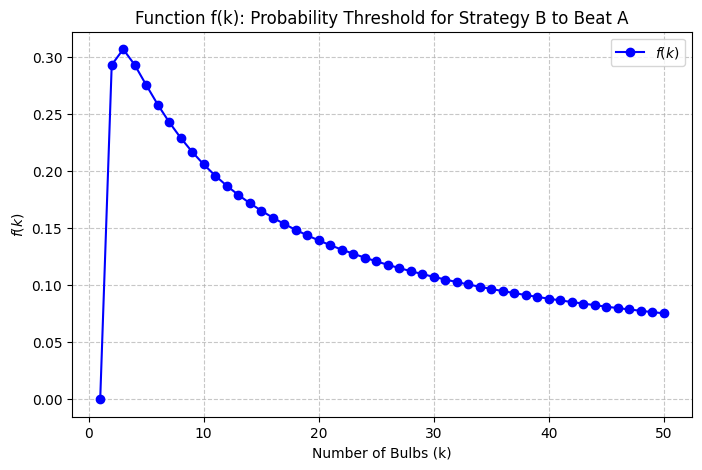

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect


k_values = np.arange(1, 51)
f_k_values = []

# Iterate over each k and find f(k)
for k in k_values:
    # Binary search for max p such that E[X] < k
    low, high = 0, 1
    while high - low > 1e-4:  # Tolerance for precision 0.0001
        p = (low + high) / 2  # Midpoint
        E_X = k + 1 - k * (1 - p) ** k  # Compute expected value
        
        if E_X < k:
            low = p  # Increase p if condition is satisfied
        else:
            high = p  # Decrease p if not

    f_k_values.append(low) 
# Plot f(k)
plt.figure(figsize=(8,5))
plt.plot(k_values, f_k_values, marker='o', linestyle='-', color='b', label=r"$f(k)$")
plt.xlabel("Number of Bulbs (k)")
plt.ylabel(r"$f(k)$")
plt.title("Function f(k): Probability Threshold for Strategy B to Beat A")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


with linear search

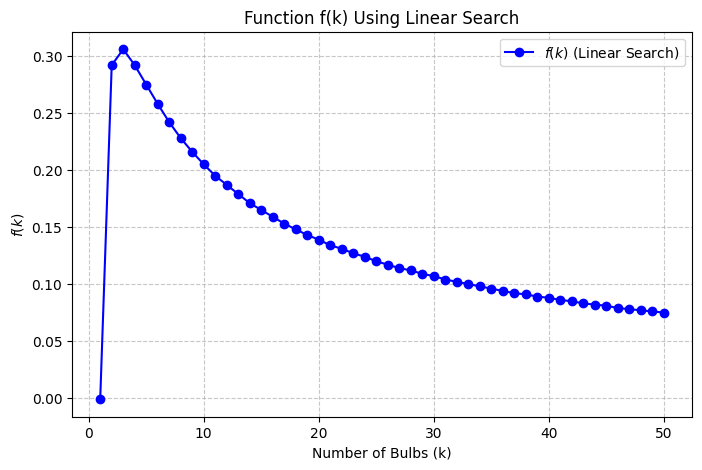

In [10]:
import numpy as np
import matplotlib.pyplot as plt


k_values = np.arange(1, 51)
f_k_values = []

# Iterate over each k
for k in k_values:
    p = 0  
    step = 0.001  # Add 0.001 untill you reach  probability 1 to test each value between 0 and 1

    while p < 1:
        E_X = k + 1 - k * (1 - p) ** k  # Compute expected value by the formula
        
        if E_X >= k:  
            break
        p += step 

    f_k_values.append(p - step)  

# Plot f(k)
plt.figure(figsize=(8,5))
plt.plot(k_values, f_k_values, marker='o', linestyle='-', color='b', label=r"$f(k)$ (Linear Search)")
plt.xlabel("Number of Bulbs (k)")
plt.ylabel(r"$f(k)$")
plt.title("Function f(k) Using Linear Search")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


1 C)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng()

def simulate_groups(n, k, p, nrRuns=100000):

    m = n // k  # this is the number of groups
    total_tests = 0

    for _ in range(nrRuns):
        # Simulate testing each group
        for _ in range(m):
            bulbs_working = rng.random(k) > p  # True if working, False if not working
            if np.all(bulbs_working):  #checking if all bulbs are working
                total_tests += 1
            else:  
                total_tests += k + 1

    return total_tests / nrRuns  # average tests


n_values = [50, 100, 200, 500] 
k_values = [2, 5, 10]  #  group sizes
p = 0.2  
nrRuns = 100000  


results = []

# Run simulations for different values of n and k
for n in n_values:
    for k in k_values:
        if n % k == 0:  # checking divisibility
            estimated_E_T = simulate_groups(n, k, p, nrRuns)
            theoretical_E_T = n * (1 + (1 / k) - (1 - p) ** k)
            
          
            results.append([n, k, estimated_E_T, theoretical_E_T])



df_results = pd.DataFrame(results, columns=["n", "k", "Estimated E[T]", "Theoretical E[T]"])
df_results

# Plot estimated vs theoretical E[T] for visualization
plt.figure(figsize=(8,5))

for k in k_values:
    n_subset = [r[0] for r in results if r[1] == k]
    estimated_E_T = [r[2] for r in results if r[1] == k]
    theoretical_E_T = [r[3] for r in results if r[1] == k]

    plt.plot(n_subset, estimated_E_T, marker='o', linestyle='-', label=f"Simulated E[T] (k={k})")
    plt.plot(n_subset, theoretical_E_T, marker='x', linestyle='--', label=f"Theoretical E[T] (k={k})")

plt.xlabel("Total Number of Bulbs (n)")
plt.ylabel("Expected Number of Tests (E[T])")
plt.title("Simulated vs Theoretical Expected Number of Tests")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


KeyboardInterrupt: 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng()

def simulate_group_testing(n, k, p, nrRuns=100000):
  
    m = n // k  
    
    bulb_status = rng.random(size=(nrRuns, m, k)) > p  # Generate a matrix with True = Working, False = Failed
    
    all_groups_work = np.all(bulb_status, axis=2) # Check if all bulbs in each group work
    
    test_counts_per_group = np.where(all_groups_work, 1, k + 1)  #nr tests : if all bulbs work, 1 test; otherwise, k+1 tests
    
    total_tests = np.sum(test_counts_per_group, axis=1)  # Sum across groups to get total test count 
    
    return np.mean(total_tests)  

# Parameters
n_values = [50, 100, 200, 500]  #  bulbs
k_values = [2, 5, 10]  # group sizes
p = 0.2  
nrRuns = 10000 


results = []

# Run simulations for different values of n and k
for n in n_values:
    for k in k_values:
        if n % k == 0:  
            estimated_E_T = simulate_group_testing(n, k, p, nrRuns)
            theoretical_E_T = n * (1 + (1 / k) - (1 - p) ** k)
            
            results.append([n, k, estimated_E_T, theoretical_E_T])


df_results = pd.DataFrame(results, columns=["n", "k", "Estimated E[T]", "Theoretical E[T]"])
df_results


# Plot estimated vs theoretical E[T] for visualization
# plt.figure(figsize=(8,5))

# for k in k_values:
#     n_subset = [r[0] for r in results if r[1] == k]
#     estimated_E_T = [r[2] for r in results if r[1] == k]
#     theoretical_E_T = [r[3] for r in results if r[1] == k]

#     plt.plot(n_subset, estimated_E_T, marker='o', linestyle='-', label=f"Simulated E[T] (k={k})")
#     plt.plot(n_subset, theoretical_E_T, marker='x', linestyle='--', label=f"Theoretical E[T] (k={k})")

# plt.xlabel("Total Number of Bulbs (n)")
# plt.ylabel("Expected Number of Tests (E[T])")
# plt.title("Optimized Simulated vs Theoretical Expected Number of Tests")
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# df_results.head()

,n,k,Estimated E[T],Theoretical E[T]
0,50,2,42.9656,43.000000
1,50,5,43.5920,43.616000
2,50,10,49.5830,49.631291
3,100,2,86.0730,86.000000
4,100,5,87.3605,87.232000
5,100,10,99.2690,99.262582
6,200,2,172.0724,172.000000
7,200,5,174.3135,174.464000
8,200,10,198.6350,198.525164
9,500,2,430.0530,430.000000


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm  

rng = np.random.default_rng()

def simulate_groups(n, k, p, nrRuns=100000):
    m = n // k  
    bulb_status = rng.random(size=(nrRuns, m, k)) > p  # Generate bulb statuses

    all_groups_work = np.all(bulb_status, axis=2)  # Check if all bulbs in each group work

    test_counts_per_group = np.where(all_groups_work, 1, k + 1)  # Count tests for each group

    total_tests = np.sum(test_counts_per_group, axis=1)  # Total tests per run
    return total_tests  

def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) 
    margin = norm.ppf((1 + confidence) / 2) * std_err  
    return mean, mean - margin, mean + margin

# Parameters
n_values = [50, 100, 200, 500]
k_values = [2, 5, 10]
p = 0.2
nrRuns = 10000

results = []

# Run simulations for different values of n and k
for n in n_values:
    for k in k_values:
        if n % k == 0:  
            test_results = simulate_groups(n, k, p, nrRuns)
            estimated_E_T, lower_CI, upper_CI = compute_ci(test_results)
            theoretical_E_T = n * (1 + (1 / k) - (1 - p) ** k)
            
            results.append([n, k, estimated_E_T, lower_CI, upper_CI, theoretical_E_T])

df_results = pd.DataFrame(results, columns=["n", "k", "Estimated E[T]", "Lower 95% CI", "Upper 95% CI", "Theoretical E[T]"])
print(df_results)


      n   k  Estimated E[T]  Lower 95% CI  Upper 95% CI  Theoretical E[T]
0    50   2         42.9704     42.875668     43.065132         43.000000
1    50   5         43.6905     43.546369     43.834631         43.616000
2    50  10         49.7180     49.583510     49.852490         49.631291
3   100   2         86.0286     85.896290     86.160910         86.000000
4   100   5         87.1610     86.954671     87.367329         87.232000
5   100  10         99.3260     99.133170     99.518830         99.262582
6   200   2        172.0820    171.895407    172.268593        172.000000
7   200   5        174.4775    174.187302    174.767698        174.464000
8   200  10        198.6350    198.366932    198.903068        198.525164
9   500   2        429.9624    429.664768    430.260032        430.000000
10  500   5        436.3075    435.855499    436.759501        436.160000
11  500  10        496.1770    495.748811    496.605189        496.312909


In [23]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import DescrStatsW

# Random number generator
rng = np.random.default_rng()

# Simulate group testing strategy
def simulate_groups(n, k, p, nrRuns=100000):
    m = n // k  # Number of groups
    bulb_status = rng.random(size=(nrRuns, m, k)) > p  # Bulb working status

    all_groups_work = np.all(bulb_status, axis=2)  # Check if all bulbs in a group work

    test_counts_per_group = np.where(all_groups_work, 1, k + 1)  # Tests required per group

    total_tests = np.sum(test_counts_per_group, axis=1)  # Total tests per run
    return total_tests

# Parameters
n_values = [50, 100, 200, 500]
k_values = [2, 5, 10]
p = 0.2
nrRuns = 10000

results = []

# Run simulations for different values of n and k
for n in n_values:
    for k in k_values:
        if n % k == 0:  # Ensure n is divisible by k
            test_results = simulate_groups(n, k, p, nrRuns)
            
            # Use DescrStatsW for mean and confidence interval
            stats = DescrStatsW(test_results)
            estimated_E_T = stats.mean
            lower_CI, upper_CI = stats.tconfint_mean(alpha=0.05)  # 95% CI

            # Theoretical expected value
            theoretical_E_T = n * (1 + (1 / k) - (1 - p) ** k)

            results.append([n, k, estimated_E_T, lower_CI, upper_CI, theoretical_E_T])

# Create DataFrame for results
df_results = pd.DataFrame(results, columns=["n", "k", "Estimated E[T]", "Lower 95% CI", "Upper 95% CI", "Theoretical E[T]"])
print(df_results)


      n   k  Estimated E[T]  Lower 95% CI  Upper 95% CI  Theoretical E[T]
0    50   2         42.9284     42.834314     43.022486         43.000000
1    50   5         43.5180     43.371726     43.664274         43.616000
2    50  10         49.6290     49.492449     49.765551         49.631291
3   100   2         86.1216     85.987729     86.255471         86.000000
4   100   5         87.1670     86.960215     87.373785         87.232000
5   100  10         99.1400     98.945702     99.334298         99.262582
6   200   2        172.0868    171.897371    172.276229        172.000000
7   200   5        174.3810    174.092395    174.669605        174.464000
8   200  10        198.5130    198.240428    198.785572        198.525164
9   500   2        430.0690    429.770362    430.367638        430.000000
10  500   5        435.6450    435.181059    436.108941        436.160000
11  500  10        496.1160    495.683998    496.548002        496.312909


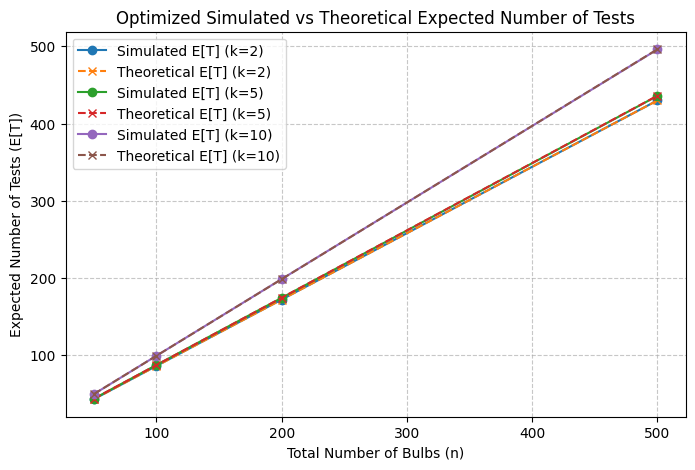

In [6]:

plt.figure(figsize=(8,5))

for k in k_values:
    n_subset = [r[0] for r in results if r[1] == k]
    estimated_E_T = [r[2] for r in results if r[1] == k]
    theoretical_E_T = [r[3] for r in results if r[1] == k]

    plt.plot(n_subset, estimated_E_T, marker='o', linestyle='-', label=f"Simulated E[T] (k={k})")
    plt.plot(n_subset, theoretical_E_T, marker='x', linestyle='--', label=f"Theoretical E[T] (k={k})")

plt.xlabel("Total Number of Bulbs (n)")
plt.ylabel("Expected Number of Tests (E[T])")
plt.title("Optimized Simulated vs Theoretical Expected Number of Tests")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

4c) 

Is it okay that I am using the function provided from the task as given? After all it is proven in 4a)?

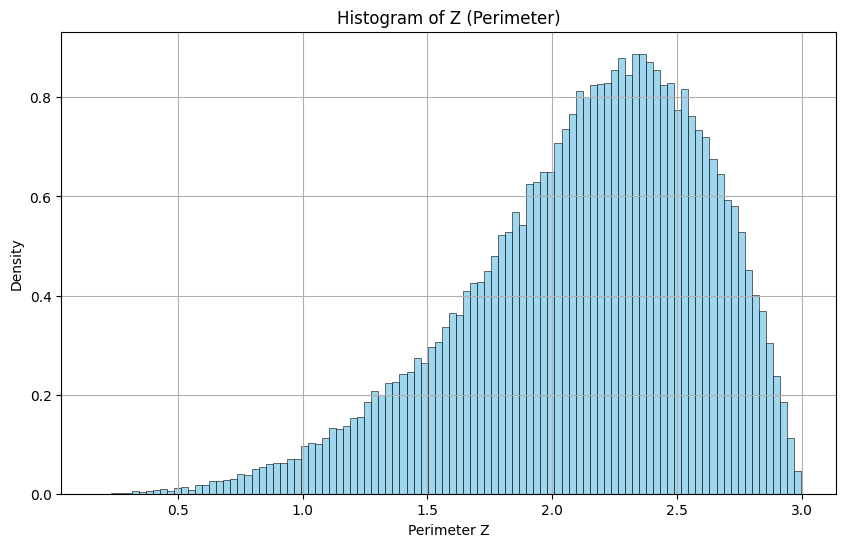

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# We are going to use the sampling function from the task description 
def sampleXY(n):
    rng = np.random.default_rng()
    u1 = rng.random(n)
    xs = u1 ** 0.25
    u2 = rng.random(n)
    ys = np.sqrt(u2) * xs / 2
    return xs, ys


nR_Samples = 100000

X_samples, Y_samples = sampleXY(nR_Samples)
Z_samples = 2 * (X_samples + Y_samples)


plt.figure(figsize=(10, 6))
plt.hist(Z_samples, bins=100, density=True, alpha=0.8, color='skyblue', edgecolor='black', linewidth=0.5)
plt.title('Histogram of Z (Perimeter)')
plt.xlabel('Perimeter Z')
plt.ylabel('Density')
plt.grid(True)
plt.show()



4d)

In [21]:
import numpy as np

# We are going to use the sampling function from the task description 
def sampleXY(n):
    rng = np.random.default_rng()
    u1 = rng.random(n)
    xs = u1 ** 0.25
    u2 = rng.random(n)
    ys = np.sqrt(u2) * xs / 2
    return xs, ys

nR_Samples = 100000
X_samples, Y_samples = sampleXY(nR_Samples)
B_samples = np.pi * (X_samples**2 + Y_samples**2)

E_B = np.mean(B_samples)
E_B


2.358297963061996